In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats
from pandas.plotting import autocorrelation_plot
from scipy import signal
from sklearn import linear_model

In [3]:
df = pd.read_pickle('./data/MaunaLoa_Detrend.pickle')

In [4]:
df.head()

,Original,Performance,Interpolated,WeekIndex,LinearFit,LinearDetrend,SGSeasonalTrend,SGLongTermTrend,SGSeasonalDetrend,SGLongTermDetrend
Timestamp,,,,,,,,,,
1974-05-19,333.34,6,333.34,0,326.242628,7.097372,333.798807,329.590409,-0.458807,3.749591
1974-05-26,332.95,6,332.95,1,326.276478,6.673522,333.308328,329.614732,-0.358328,3.335268
1974-06-02,332.32,5,332.32,2,326.310328,6.009672,332.835895,329.639076,-0.515895,2.680924
1974-06-09,332.18,7,332.18,3,326.344178,5.835822,332.381506,329.663442,-0.201506,2.516558
1974-06-16,332.37,7,332.37,4,326.378028,5.991972,331.945162,329.687830,0.424838,2.682170


In [5]:
ktrends = [c for c in df.columns if c.endswith('Trend') or c.endswith('Fit')]
kdetrends = [c for c in df.columns if c.endswith('Detrend')]

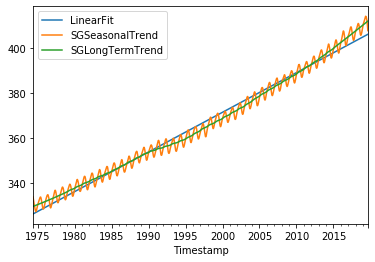

In [6]:
df[ktrends].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0xaad3ec30>,
      dtype=object)

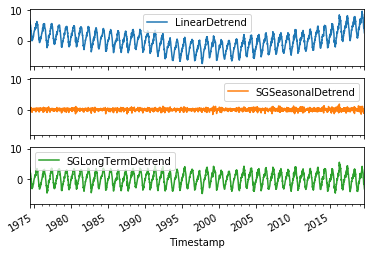

In [7]:
df[kdetrends].plot(subplots=True, sharex=True, sharey=True)

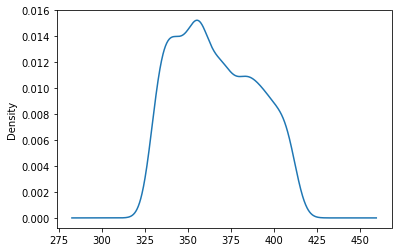

In [8]:
df["Original"].plot(kind='kde')

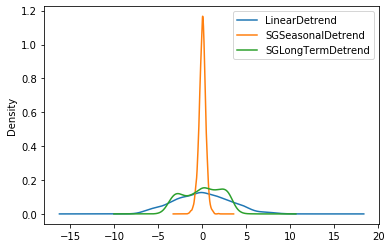

In [9]:
df[kdetrends].plot(kind='kde')

In [10]:
t = (df.index - df.index[0]).total_seconds().values
w = 7*24*60*60

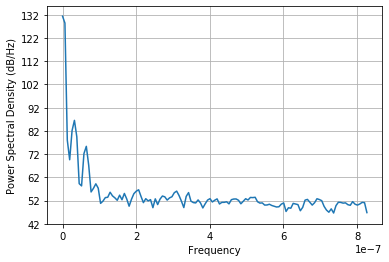

In [11]:
_ = plt.psd(df['Interpolated'], Fs=1/w)

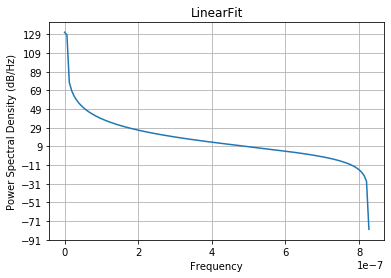

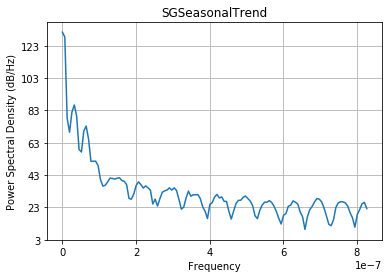

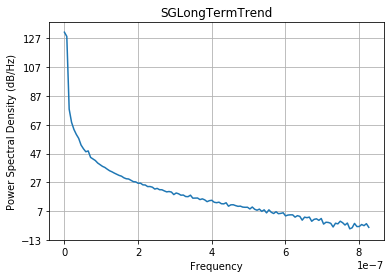

In [12]:
for k in ktrends:
    fig, axe = plt.subplots()
    _ = axe.psd(df[k], Fs=1/w)
    axe.set_title(k)

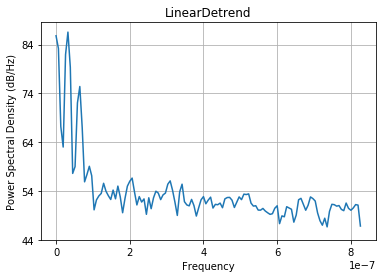

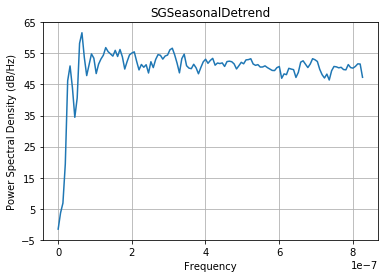

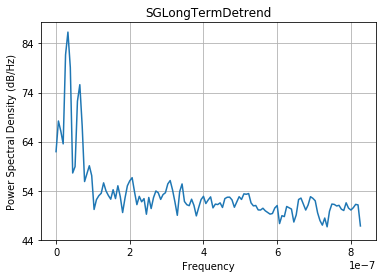

In [13]:
for k in kdetrends:
    fig, axe = plt.subplots()
    _ = axe.psd(df[k], Fs=1/w)
    axe.set_title(k)